<a href="https://colab.research.google.com/github/Deepa-chaurasiya01/Learning_ML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
df = pd.read_csv('/content/Classified Data.csv', index_col=0)

In [35]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Here as we can see we don't know what these column names or the row  represents 
you just know that you've to predict a target class 1 or 0 

In [36]:
from sklearn.preprocessing import StandardScaler

What is StandardScaler in Sklearn?


StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. ... StandardScaler makes the mean of the distribution approximately 0.

Why we use from Sklearn preprocessing import StandardScaler?

Image result for from sklearn.preprocessing import StandardScaler
preprocessing . StandardScaler. Standardize features by removing the mean and scaling to unit variance.

In [37]:
scaler = StandardScaler() # instance

In [38]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler()

In [39]:
#  we'll use the scalar obj to do transformation
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [40]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In Dataset: The scaled version of the dataset. and these actual values are quit close to each other

So, it's always a good idea to do some sort of standard scaling transfornamtion on this arrays

In [41]:
df_feat = pd.DataFrame(scaled_features, columns =['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'])

In [42]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Our data is ready for the train-test-split 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X =df_feat
y = df['TARGET CLASS']

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

Now we have our train test split model 

Now we'll use KNN ,  remember we're trying to come up with model predict whther someone will be inside that target class or not 

K = 1

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Prediction & Evaluation

In [49]:
pred = knn.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
confusion_matrix(y_test, pred) # pred for prediction

array([[151,   8],
       [ 15, 126]])

In [52]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.95      0.93       159\n           1       0.94      0.89      0.92       141\n\n    accuracy                           0.92       300\n   macro avg       0.92      0.92      0.92       300\nweighted avg       0.92      0.92      0.92       300\n'

In [66]:
# elbow method to choose a corect K value
error_rate = []

for i in range(1,45):
    knn = KNeighborsClassifier(n_neighbors= 1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #the average error rate


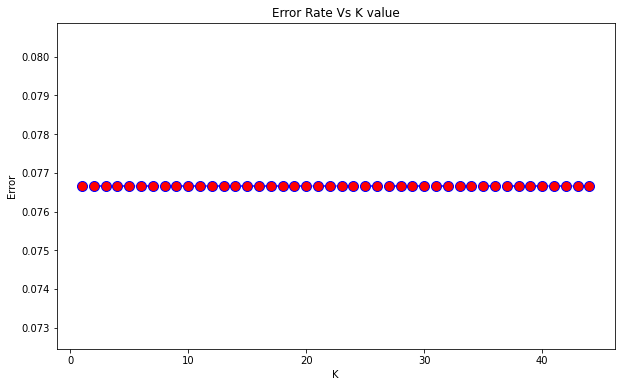

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45), error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [74]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
confusion_matrix(y_test, pred)


array([[153,   6],
       [  9, 132]])

In [76]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       159\n           1       0.96      0.94      0.95       141\n\n    accuracy                           0.95       300\n   macro avg       0.95      0.95      0.95       300\nweighted avg       0.95      0.95      0.95       300\n'